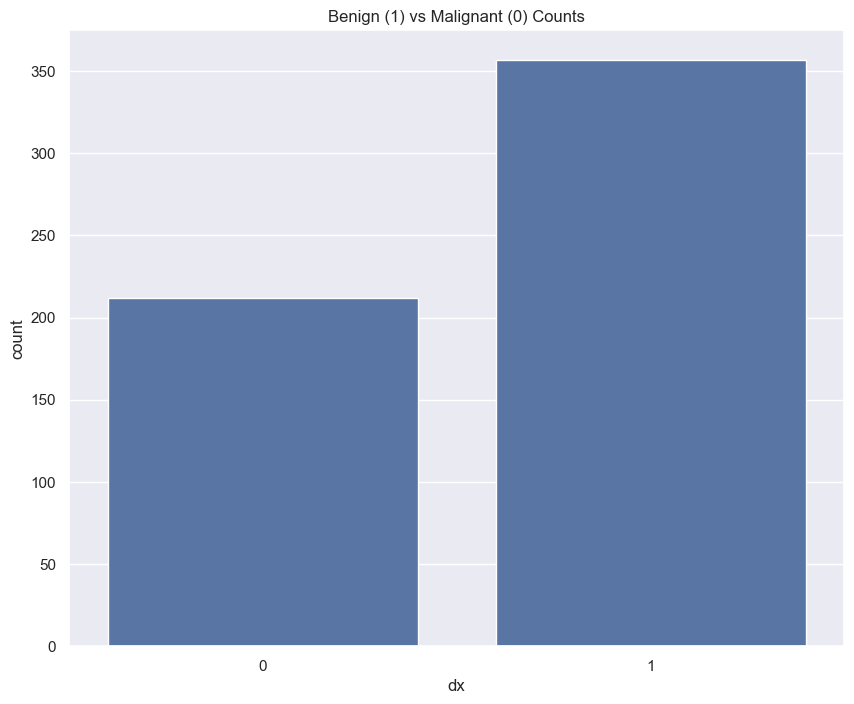

In [8]:
## 准备工作
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import uniform, randint
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import xgboost as xgb

# 数据导入
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
df = pd.DataFrame(X, columns=cancer.feature_names)
df['dx'] = y

# 数据可视化
sns.set()
plt.figure(figsize=(10, 8))
sns.countplot(x='dx', data=df)
plt.title('Benign (1) vs Malignant (0) Counts')
plt.show()

In [9]:
# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1898)

# 模型训练
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=1898)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

Accuracy: 0.9824561403508771

Confusion Matrix:
 [[71  3]
 [ 0 97]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        74
           1       0.97      1.00      0.98        97

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



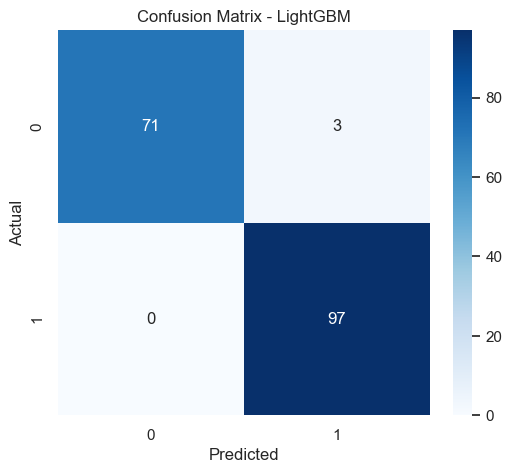

Train Accuracy: 1.0


In [20]:
# 预测与评估
y_pred = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# 可视化混淆矩阵
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LightGBM")
plt.show()
# 查看训练集准确率（检查过拟合）
y_train_pred = xgb_model.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))

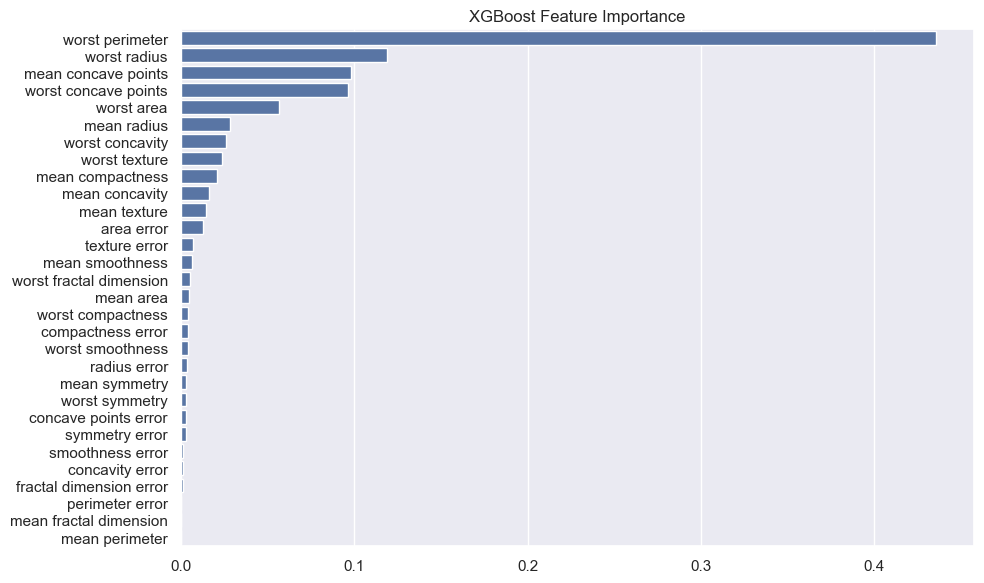

In [19]:
# 特征重要性图
importances = xgb_model.feature_importances_
features = df.columns[:-1]
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("XGBoost Feature Importance")
sns.barplot(x=importances[indices], y=np.array(features)[indices])
plt.tight_layout()
plt.show()